In [114]:
import keras
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from keras.layers import Dense

from keras import optimizers
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical

%matplotlib inline

In [115]:
from numpy import genfromtxt
EEG = genfromtxt("Confusion during MOOC/EEG_data.csv", delimiter=",")

In [116]:
#6의 raw데이터에 이상이 있으므로 6을 제외하고 분석
EEG=EEG[1:,:]
EEG=pd.DataFrame(EEG)

In [117]:
remove_6=EEG[EEG[0]==6].index
print(EEG.shape, remove_6.shape)

(12811, 15) (1275,)


In [118]:
EEG=EEG.drop(remove_6)
print(EEG.shape)

(11536, 15)


In [119]:
c_EEG=EEG[EEG[14]==0].index
nc_EEG=EEG[EEG[14]==1].index

In [165]:
ConfusedEEG=EEG.drop(c_EEG)
NonConfusedEEG=EEG.drop(nc_EEG)

In [166]:
ConfusedEEG=ConfusedEEG.values
NonConfusedEEG=NonConfusedEEG.values

In [167]:
import random
index=[]
for i in range(7) :
    index.append(random.randint(0,5606))
    
NonConfusedEEG=pd.DataFrame(NonConfusedEEG)
NonConfusedEEG=NonConfusedEEG.drop(index)
NonConfusedEEG=NonConfusedEEG.values

In [168]:
index=[]
for i in range(29) :
    index.append(random.randint(0,5928))
    
ConfusedEEG=pd.DataFrame(ConfusedEEG)
ConfusedEEG=ConfusedEEG.drop(index)
ConfusedEEG=ConfusedEEG.values

In [170]:
X=ConfusedEEG
NX=NonConfusedEEG

(5900, 15) (5600, 15)


In [ ]:
#동영상, raw, 주파수 data 사용
X1=pd.DataFrame(X)
X1=X1.drop(X1.columns[[0,2,3,13,14]], axis='columns')
#사람 정보, raw, 주파수 data 사용
X2=pd.DataFrame(X)
X2=X2.drop(X2.columns[[1,2,3,13,14]], axis='columns')
#동영상, raw, 주파수 data 사용
X3=pd.DataFrame(X)
X3=X3.drop(X3.columns[[0,2,3,4,13,14]], axis='columns')
#사람 정보, 주파수 data 사용
X4=pd.DataFrame(X)
X4=X4.drop(X4.columns[[1,2,3,4,13,14]], axis='columns')

In [172]:
#동영상, raw, 주파수 data 사용
NX1=pd.DataFrame(NX)
NX1=NX1.drop(NX1.columns[[0,2,3,13,14]], axis='columns')
#사람 정보, raw, 주파수 data 사용
NX2=pd.DataFrame(NX)
NX2=NX2.drop(NX2.columns[[1,2,3,13,14]], axis='columns')
#동영상, raw, 주파수 data 사용
NX3=pd.DataFrame(NX)
NX3=NX3.drop(NX3.columns[[0,2,3,4,13,14]], axis='columns')
#사람 정보, 주파수 data 사용
NX4=pd.DataFrame(NX)
NX4=NX4.drop(NX4.columns[[1,2,3,4,13,14]], axis='columns')

In [173]:
X1=X1.values
X2=X2.values
X3=X3.values
X4=X4.values

NX1=NX1.values
NX2=NX2.values
NX3=NX3.values
NX4=NX4.values

print(X1.shape, X2.shape, X3.shape, X4.shape)
print(NX1.shape, NX2.shape, NX3.shape, NX4.shape)

(5900, 10) (5900, 10) (5900, 9) (5900, 9)
(5600, 10) (5600, 10) (5600, 9) (5600, 9)


In [255]:
#X=X1
X=X2
#X=X3
#X=X4

#NX=NX1
NX=NX2
#NX=NX3
#NX=NX4

print(X.shape, NX.shape)

(5900, 10) (5600, 10)


In [256]:
#정규화
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X[:]=scaler.fit_transform(X[:])
NX[:]=scaler.fit_transform(NX[:])

In [257]:
X = X.reshape(590,10, 10)
NX = NX.reshape(560,10, 10)
print(X[0].shape)

(10, 10)


In [258]:
label_X= np.zeros((590,1))
label_NX=np.ones((560,1))
label=np.r_[label_X,label_NX]
print(label.shape)

(1150, 1)


In [259]:
data=np.r_[X,NX]
print(data.shape)

(1150, 10, 10)


In [260]:
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.4, random_state=115)

In [261]:
from tensorflow.keras import utils as np_utils
#one-hot encoding
y_train      = np_utils.to_categorical(y_train)
y_test       = np_utils.to_categorical(y_test)

print(y_train.shape, y_test.shape)

(690, 2) (460, 2)


In [262]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2],1)

print(X_train.shape, X_test.shape)

(690, 10, 10, 1) (460, 10, 10, 1)


In [263]:
from keras.models import Sequential, Model 
from keras.utils import np_utils
from keras.layers import  BatchNormalization,Dense, Conv2D, Convolution2D, MaxPooling2D, Dropout, Flatten, TimeDistributed, InputLayer, LSTM
from keras.layers import Input, Reshape, Activation, add, Add
from keras.utils.vis_utils import model_to_dot
from keras.utils.vis_utils import plot_model

In [264]:
def basic_cnn():
    model = Sequential()

    model.add(Conv2D(input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), filters = 50, kernel_size = (2,2), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (2,2), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    model.add(Conv2D(filters = 50, kernel_size = (2,2), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (2,2), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))

    # prior layer should be flattend to be connected to dense layers
    model.add(Flatten())
    
    
    # final layer with 10 neurons to classify the instances
    model.add(Dense(50, activation = 'relu'))
    
    # final layer with 10 neurons to classify the instances
    model.add(Dense(2, activation = 'softmax'))

    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

    return model

model = basic_cnn()
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 10, 10, 50)        250       
_________________________________________________________________
activation_17 (Activation)   (None, 10, 10, 50)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 10, 10, 50)        10050     
_________________________________________________________________
activation_18 (Activation)   (None, 10, 10, 50)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 50)          0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 5, 5, 50)          10050     
_________________________________________________________________
activation_19 (Activation)   (None, 5, 5, 50)         

In [265]:
hist=model.fit(X_train, y_train, epochs=300, batch_size=50, validation_data=(X_test,y_test))

Train on 690 samples, validate on 460 samples
Epoch 1/300
690/690 [==============================] - 0s 410us/step - loss: 0.6902 - accuracy: 0.5246 - val_loss: 0.6979 - val_accuracy: 0.4783
Epoch 2/300
690/690 [==============================] - 0s 142us/step - loss: 0.6727 - accuracy: 0.5522 - val_loss: 0.6933 - val_accuracy: 0.4783
Epoch 3/300
690/690 [==============================] - 0s 136us/step - loss: 0.6405 - accuracy: 0.6232 - val_loss: 0.6445 - val_accuracy: 0.6326
Epoch 4/300
690/690 [==============================] - 0s 145us/step - loss: 0.6033 - accuracy: 0.6623 - val_loss: 0.5872 - val_accuracy: 0.6826
Epoch 5/300
690/690 [==============================] - 0s 142us/step - loss: 0.4592 - accuracy: 0.8058 - val_loss: 0.3703 - val_accuracy: 0.8630
Epoch 6/300
690/690 [==============================] - 0s 137us/step - loss: 0.3099 - accuracy: 0.8812 - val_loss: 0.2318 - val_accuracy: 0.9043
Epoch 7/300
690/690 [==============================] - 0s 139us/step - loss: 0.2298 

690/690 [==============================] - 0s 142us/step - loss: 5.6956e-04 - accuracy: 1.0000 - val_loss: 0.1193 - val_accuracy: 0.9739
Epoch 57/300
690/690 [==============================] - 0s 143us/step - loss: 5.3556e-04 - accuracy: 1.0000 - val_loss: 0.1202 - val_accuracy: 0.9761
Epoch 58/300
690/690 [==============================] - 0s 143us/step - loss: 5.0706e-04 - accuracy: 1.0000 - val_loss: 0.1205 - val_accuracy: 0.9761
Epoch 59/300
690/690 [==============================] - 0s 143us/step - loss: 5.3843e-04 - accuracy: 1.0000 - val_loss: 0.1208 - val_accuracy: 0.9761
Epoch 60/300
690/690 [==============================] - 0s 143us/step - loss: 4.3993e-04 - accuracy: 1.0000 - val_loss: 0.1244 - val_accuracy: 0.9739
Epoch 61/300
690/690 [==============================] - 0s 139us/step - loss: 4.8818e-04 - accuracy: 1.0000 - val_loss: 0.1232 - val_accuracy: 0.9761
Epoch 62/300
690/690 [==============================] - 0s 139us/step - loss: 4.1996e-04 - accuracy: 1.0000 - val

690/690 [==============================] - 0s 140us/step - loss: 8.9201e-05 - accuracy: 1.0000 - val_loss: 0.1529 - val_accuracy: 0.9739
Epoch 111/300
690/690 [==============================] - 0s 137us/step - loss: 8.7865e-05 - accuracy: 1.0000 - val_loss: 0.1531 - val_accuracy: 0.9739
Epoch 112/300
690/690 [==============================] - 0s 143us/step - loss: 8.6784e-05 - accuracy: 1.0000 - val_loss: 0.1532 - val_accuracy: 0.9739
Epoch 113/300
690/690 [==============================] - 0s 137us/step - loss: 9.2399e-05 - accuracy: 1.0000 - val_loss: 0.1550 - val_accuracy: 0.9739
Epoch 114/300
690/690 [==============================] - 0s 139us/step - loss: 8.7336e-05 - accuracy: 1.0000 - val_loss: 0.1539 - val_accuracy: 0.9739
Epoch 115/300
690/690 [==============================] - 0s 140us/step - loss: 8.0618e-05 - accuracy: 1.0000 - val_loss: 0.1544 - val_accuracy: 0.9739
Epoch 116/300
690/690 [==============================] - 0s 142us/step - loss: 8.0160e-05 - accuracy: 1.0000

690/690 [==============================] - 0s 143us/step - loss: 2.9392e-05 - accuracy: 1.0000 - val_loss: 0.1737 - val_accuracy: 0.9739
Epoch 165/300
690/690 [==============================] - 0s 140us/step - loss: 2.9041e-05 - accuracy: 1.0000 - val_loss: 0.1737 - val_accuracy: 0.9739
Epoch 166/300
690/690 [==============================] - 0s 146us/step - loss: 2.8397e-05 - accuracy: 1.0000 - val_loss: 0.1737 - val_accuracy: 0.9717
Epoch 167/300
690/690 [==============================] - 0s 145us/step - loss: 2.7950e-05 - accuracy: 1.0000 - val_loss: 0.1740 - val_accuracy: 0.9717
Epoch 168/300
690/690 [==============================] - 0s 140us/step - loss: 2.7813e-05 - accuracy: 1.0000 - val_loss: 0.1747 - val_accuracy: 0.9739
Epoch 169/300
690/690 [==============================] - 0s 150us/step - loss: 2.7092e-05 - accuracy: 1.0000 - val_loss: 0.1745 - val_accuracy: 0.9717
Epoch 170/300
690/690 [==============================] - 0s 140us/step - loss: 2.6960e-05 - accuracy: 1.0000

690/690 [==============================] - 0s 142us/step - loss: 1.2762e-05 - accuracy: 1.0000 - val_loss: 0.1890 - val_accuracy: 0.9739
Epoch 219/300
690/690 [==============================] - 0s 149us/step - loss: 1.2988e-05 - accuracy: 1.0000 - val_loss: 0.1894 - val_accuracy: 0.9739
Epoch 220/300
690/690 [==============================] - 0s 137us/step - loss: 1.2447e-05 - accuracy: 1.0000 - val_loss: 0.1890 - val_accuracy: 0.9717
Epoch 221/300
690/690 [==============================] - 0s 145us/step - loss: 1.2404e-05 - accuracy: 1.0000 - val_loss: 0.1891 - val_accuracy: 0.9717
Epoch 222/300
690/690 [==============================] - 0s 143us/step - loss: 1.2195e-05 - accuracy: 1.0000 - val_loss: 0.1896 - val_accuracy: 0.9717
Epoch 223/300
690/690 [==============================] - 0s 143us/step - loss: 1.1994e-05 - accuracy: 1.0000 - val_loss: 0.1901 - val_accuracy: 0.9739
Epoch 224/300
690/690 [==============================] - 0s 177us/step - loss: 1.2052e-05 - accuracy: 1.0000

690/690 [==============================] - 0s 164us/step - loss: 6.5520e-06 - accuracy: 1.0000 - val_loss: 0.2019 - val_accuracy: 0.9717
Epoch 273/300
690/690 [==============================] - 0s 144us/step - loss: 6.3885e-06 - accuracy: 1.0000 - val_loss: 0.2026 - val_accuracy: 0.9717
Epoch 274/300
690/690 [==============================] - 0s 147us/step - loss: 6.3757e-06 - accuracy: 1.0000 - val_loss: 0.2029 - val_accuracy: 0.9717
Epoch 275/300
690/690 [==============================] - 0s 137us/step - loss: 6.1947e-06 - accuracy: 1.0000 - val_loss: 0.2027 - val_accuracy: 0.9717
Epoch 276/300
690/690 [==============================] - 0s 152us/step - loss: 6.2302e-06 - accuracy: 1.0000 - val_loss: 0.2026 - val_accuracy: 0.9717
Epoch 277/300
690/690 [==============================] - 0s 150us/step - loss: 6.1254e-06 - accuracy: 1.0000 - val_loss: 0.2030 - val_accuracy: 0.9717
Epoch 278/300
690/690 [==============================] - 0s 142us/step - loss: 5.9684e-06 - accuracy: 1.0000

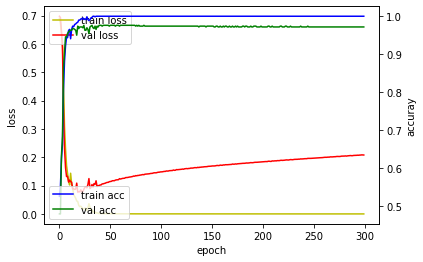

460/460 [==============================] - 0s 76us/step
Test accuracy:  0.9717391133308411


In [266]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])